# Placement visualizations by company specific

In [1]:
from IPython.display import clear_output
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
myData = pd.read_excel('PATInterns2020.xlsx', sheet_name='2020_passout')
myData = myData.set_index(['Sl no'])
myData.head()

,Registration Number,Name,Degree,Course & Branch,Campus,Company,Company Type,Domain,Placement Type
Sl no,,,,,,,,,
1,14MSE0238,Ranjani R,M.Tech - 5 year intergrated,Software Engineering,Vellore,Danfoss Industries Pvt Ltd,Dream,IT,Internship
2,15MIS0001,SAITEJA CHAKRAVARTHI REDDY NALLAMILLI,M.Tech - 5 year intergrated,Software Engineering,Vellore,Vocera communications Ind Pvt Ltd,Super Dream,IT,Internship
3,15MIS0008,Divya Ganadhipalli,M.Tech - 5 year intergrated,Software Engineering,Vellore,Continental Automotive,Dream,IT,Internship
4,15MIS0010,MASANAM MAHESH POORNA,M.Tech - 5 year intergrated,Software Engineering,Vellore,Qwikcilver Solutions,Dream,IT,Internship
5,15MIS0011,VINOTH T,M.Tech - 5 year intergrated,Software Engineering,Vellore,Virtuous Transactional Analytics Pvt. Ltd. (VI...,Dream,IT,Internship


In [3]:
def Visualise(xdata, ydata, plot_title, col):    
    #if(chart == 'bar'):
        #plt.xticks(rotation=90)
    if(col == 'Company'):        
        plt.figure(figsize=(20, 80))
    elif(col in ['Company Type', 'Degree']):
        plt.figure(figsize=(10, 5))
    else:
        plt.figure(figsize=(10, 15))
    plt.barh(xdata, ydata)
    for index, value in enumerate(ydata):
        plt.text(value, index, str(value))
    plt.title(plot_title)
    plt.show()

def GenerateCategoryCount(newData, myList, col):
    typeCount = []
    for t in myList:
        typeCount.append(newData[newData[col] == t].shape[0])
    return typeCount

def GenerateData(data, col_index, colName, item):
    regNo = []
    names = []
    degree = []
    branch = []
    for i in range(len(data)):
        if(data.iloc[i, col_index] == data[colName].unique()[item - 1]):
            regNo.append(data.iloc[i, 0])
            names.append(data.iloc[i, 1])
            degree.append(data.iloc[i, 2])
            branch.append(data.iloc[i, 3])
        mydict = {"Registration number":regNo, "Names":names, "Degree":degree, "Branch":branch}
    data = pd.DataFrame(mydict)
    return data

1. Company
2. Company Type

Enter a value from the list to filter the data: 1


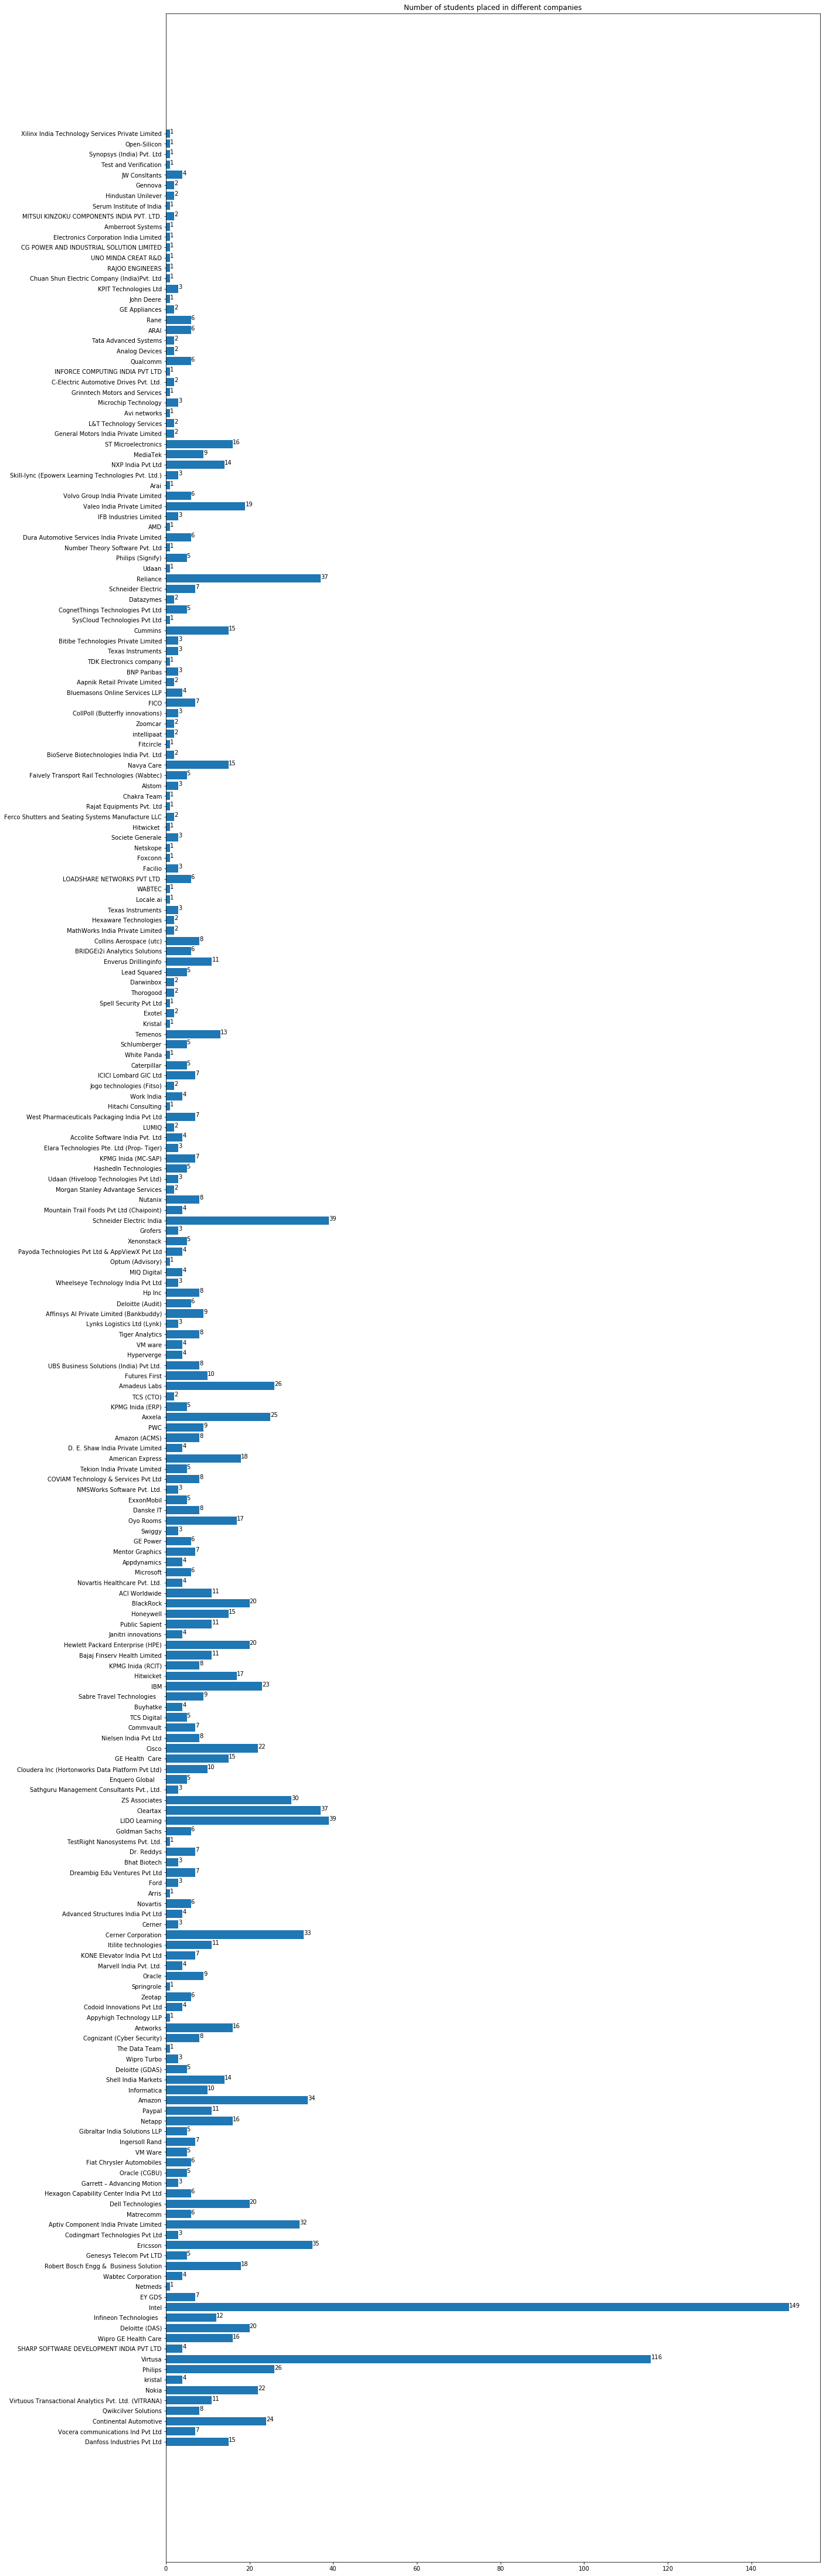

In [4]:
choice = 'yes'
while(choice == 'y' or choice == 'yes'):
    print("1. Company\n2. Company Type\n")
    val = int(input("Enter a value from the list to filter the data: "))
    if(val == 1):
        k = 'Company'
        comp = myData['Company'].unique()
        typeCount = GenerateCategoryCount(myData, comp, 'Company')
        Visualise(comp, typeCount, 'Number of students placed in different companies', "Company")
        break
    elif(val == 2):
        k = 'Company Type'
        comp = myData['Company Type'].unique()
        typeCount = GenerateCategoryCount(myData, comp, 'Company Type')
        Visualise(comp, typeCount, 'Number of students placed in company types', "Company Type")
        break
    else:
        print("\nInvalid input!")
        choice=input("\nDo you wish to continue (y / n): ").lower()
        if(choice in ['yes', 'y']):
            clear_output(wait=True)


Categories are as follows:

1. Danfoss Industries Pvt Ltd
2. Vocera communications Ind Pvt Ltd
3. Continental Automotive
4. Qwikcilver Solutions
5. Virtuous Transactional Analytics Pvt. Ltd. (VITRANA)
6. Nokia
7. kristal
8. Philips
9. Virtusa
10. SHARP SOFTWARE DEVELOPMENT INDIA PVT LTD
11. Wipro GE Health Care
12. Deloitte (DAS)
13. Infineon Technologies  
14. Intel
15. EY GDS
16. Netmeds
17. Wabtec Corporation
18. Robert Bosch Engg &  Business Solution
19. Genesys Telecom Pvt LTD
20. Ericsson
21. Codingmart Technologies Pvt Ltd
22. Aptiv Component India Private Limited
23. Matrecomm
24. Dell Technologies
25. Hexagon Capability Center India Pvt Ltd
26. Garrett – Advancing Motion
27. Oracle (CGBU)
28. Fiat Chrysler Automobiles
29. VM Ware
30. Ingersoll Rand
31. Gibraltar India Solutions LLP
32. Netapp
33. Paypal
34. Amazon
35. Informatica
36. Shell India Markets
37. Deloitte (GDAS)
38. Wipro Turbo
39. The Data Team
40. Cognizant (Cyber Security)
41. Antworks
42. Appyhigh Technology LL

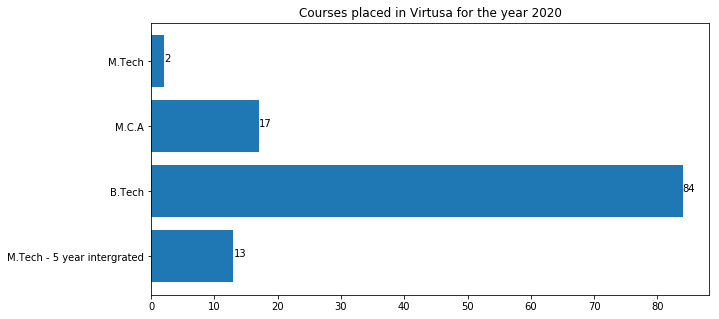


Visualizing the number of students placed from different branches


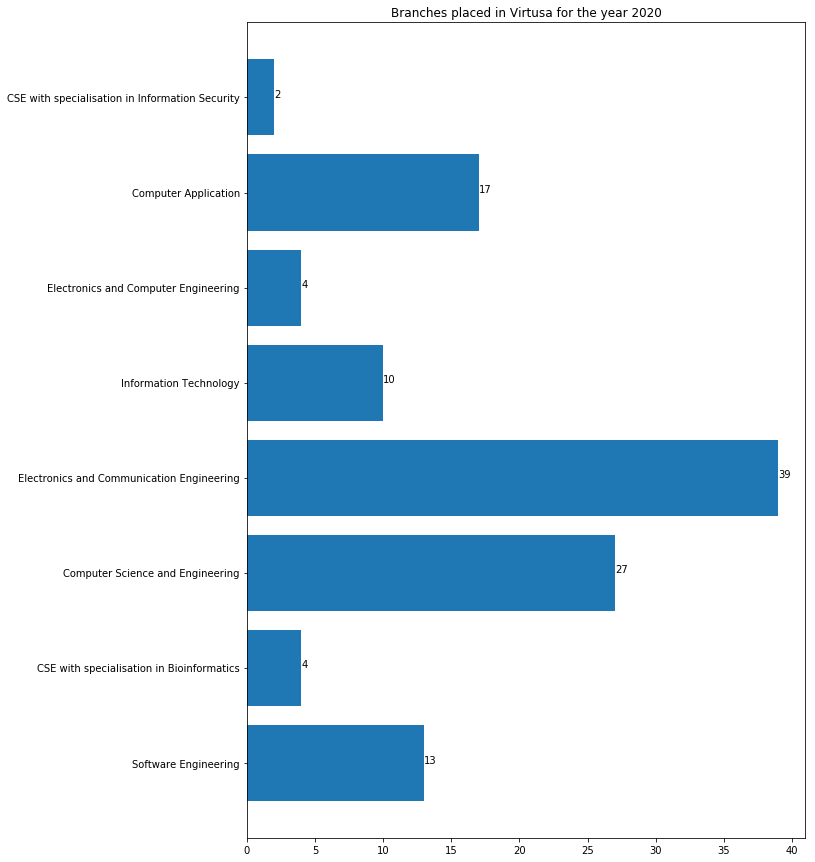


Do you wish to continue (y / n)? n


In [7]:
choice = 'yes'
while(choice == 'yes' or choice == 'y'):
    newData = myData
    columns = list(newData.columns)
    i = 0
    print("\nCategories are as follows:\n")
    for t in comp:
        i = i + 1
        print(str(i) + ". " + t)
    cat = int(input("\nEnter a category from the listed: "))
    if(cat in range(1, (len(comp)+1))):
        c = comp[cat-1]
        col_index = columns.index(k)
        newData = GenerateData(newData, col_index, k, cat)
        #Visualisation for courses
        print("\nVisualizing the number of students placed from different courses")
        degType = newData['Degree'].unique()
        typeCount = GenerateCategoryCount(newData, degType, 'Degree')
        plot_title = 'Courses placed in %s for the year 2020'%c
        Visualise(degType, typeCount, plot_title, 'Degree')
    
        #Visualization for branches
        print("\nVisualizing the number of students placed from different branches")
        branchType = newData['Branch'].unique()
        typeCount = GenerateCategoryCount(newData, branchType, 'Branch')
        plot_title = 'Branches placed in %s for the year 2020'%c
        Visualise(branchType, typeCount, plot_title, 'Branch')
    else:
        print("\nInvalid input!")
    choice = input("\nDo you wish to continue (y / n)? ").lower()
    if(choice in ['y', 'yes']):
        clear_output(wait=True)